In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('flare')
plt.rcParams['figure.figsize'] = (19.20, 5.40)

In [2]:
df_questions = pd.read_csv('../data/questions.csv')
df_answers = pd.read_csv('../data/ideal_answers.csv')

In [3]:
print(f'Rows: {len(df_questions)}')
print(f'Columns: {len(df_questions.columns)}')
df_questions.head()

Rows: 240
Columns: 4


,Question,Source Docs,Question Type,Source Chunk Type
0,How has Apple's total net sales changed over t...,*AAPL*,Multi-Doc RAG,Table
1,What are the major factors contributing to the...,*AAPL*,Multi-Doc RAG,Text
2,Has there been any significant change in Apple...,*AAPL*,Multi-Doc RAG,Table
3,How has Apple's revenue from iPhone sales fluc...,*AAPL*,Multi-Doc RAG,Table
4,Can any trends be identified in Apple�s Servic...,*AAPL*,Multi-Doc RAG,Table


In [4]:
print(f'Rows: {len(df_answers)}')
print(f'Columns: {len(df_answers.columns)}')
df_answers.head()

Rows: 195
Columns: 5


,Question,Source Docs,Question Type,Source Chunk Type,Answer
0,How has Apple's total net sales changed over t...,*AAPL*,Multi-Doc RAG,Table,"Based on the provided documents, Apple's total..."
1,What are the major factors contributing to the...,*AAPL*,Multi-Doc RAG,Text,In the most recent 10-Q for the quarter ended ...
2,Has there been any significant change in Apple...,*AAPL*,Multi-Doc RAG,Table,"Yes, there has been a change in Apple's operat..."
3,How has Apple's revenue from iPhone sales fluc...,*AAPL*,Multi-Doc RAG,Table,The revenue from iPhone sales for Apple has fl...
4,Can any trends be identified in Apple's Servic...,*AAPL*,Multi-Doc RAG,Table,"Based on the provided documents, there is a tr..."


In [5]:
df_questions = df_questions.sort_values('Source Docs')

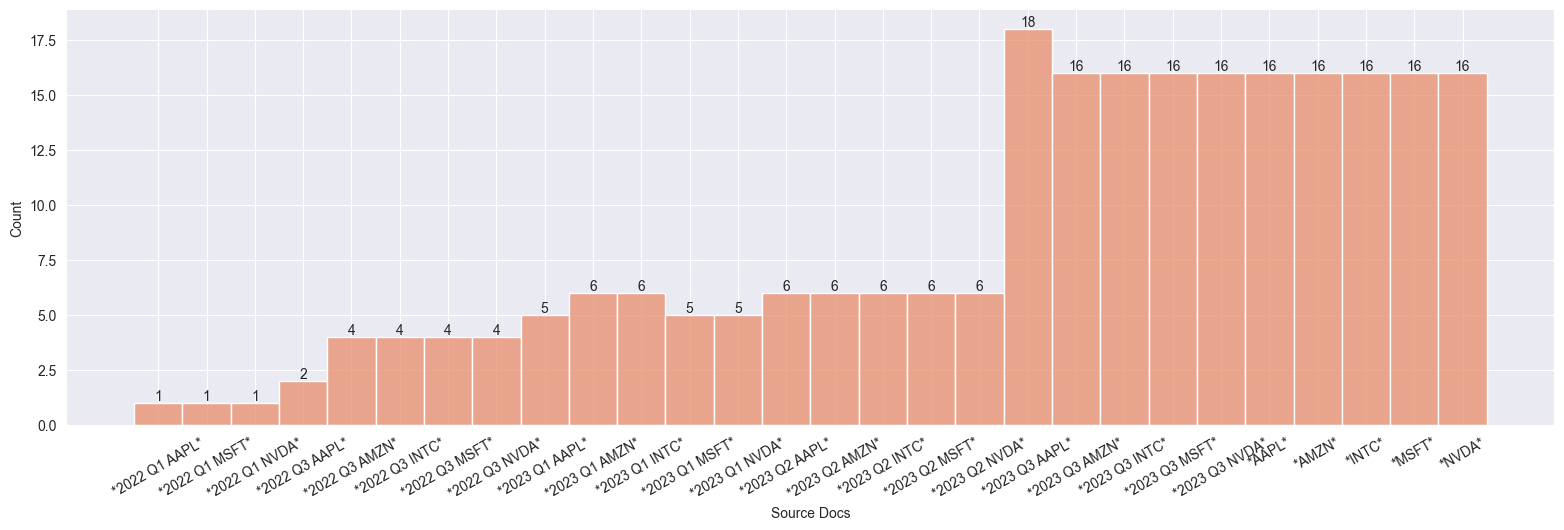

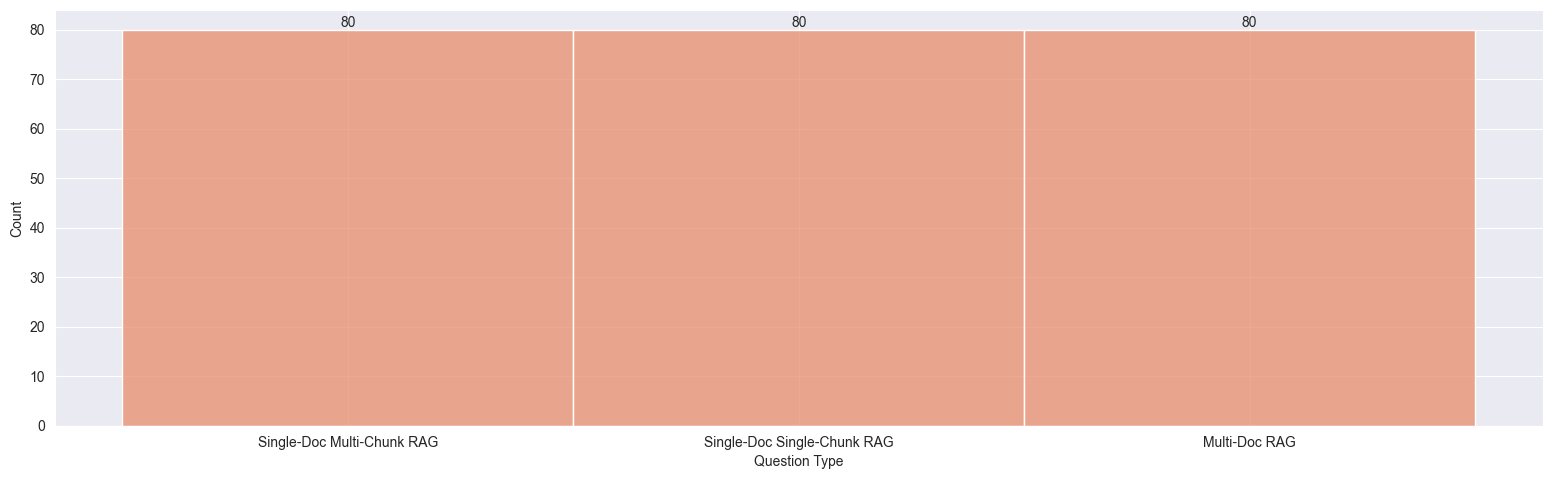

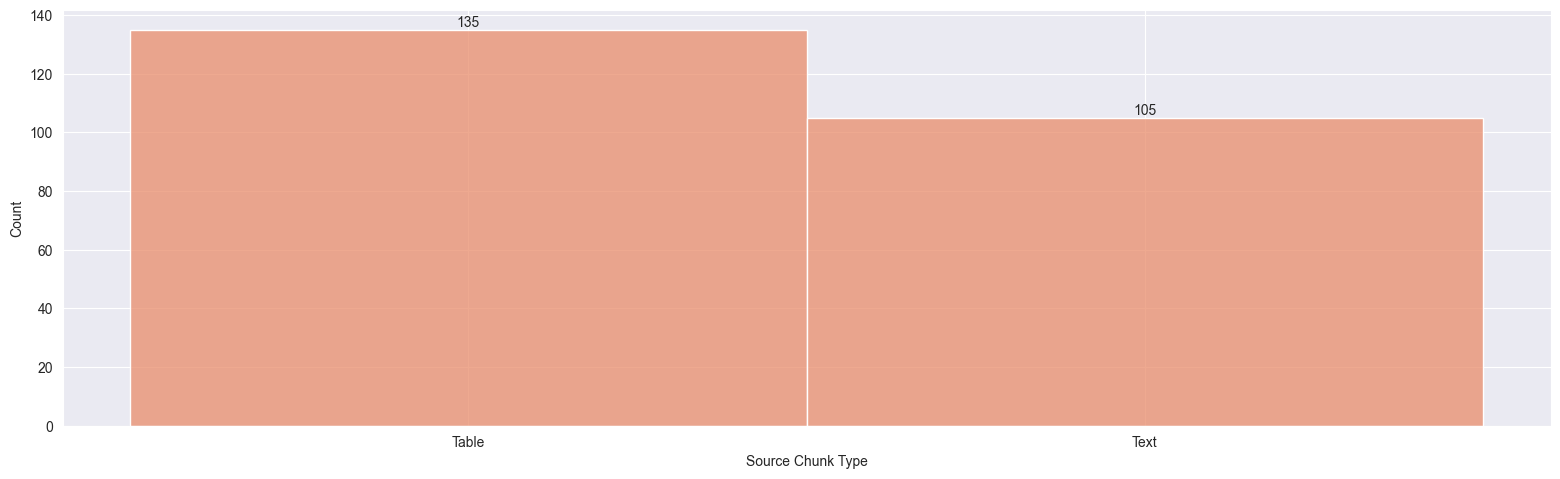

In [6]:
def plot_histograms():
    for col in ['Source Docs', 'Question Type', 'Source Chunk Type']:
        ax = sns.histplot(df_questions[col])
        ax.bar_label(ax.containers[0])

        if len(ax.containers[0].datavalues) > 10:
            plt.xticks(rotation=30)

        plt.show()

plot_histograms()

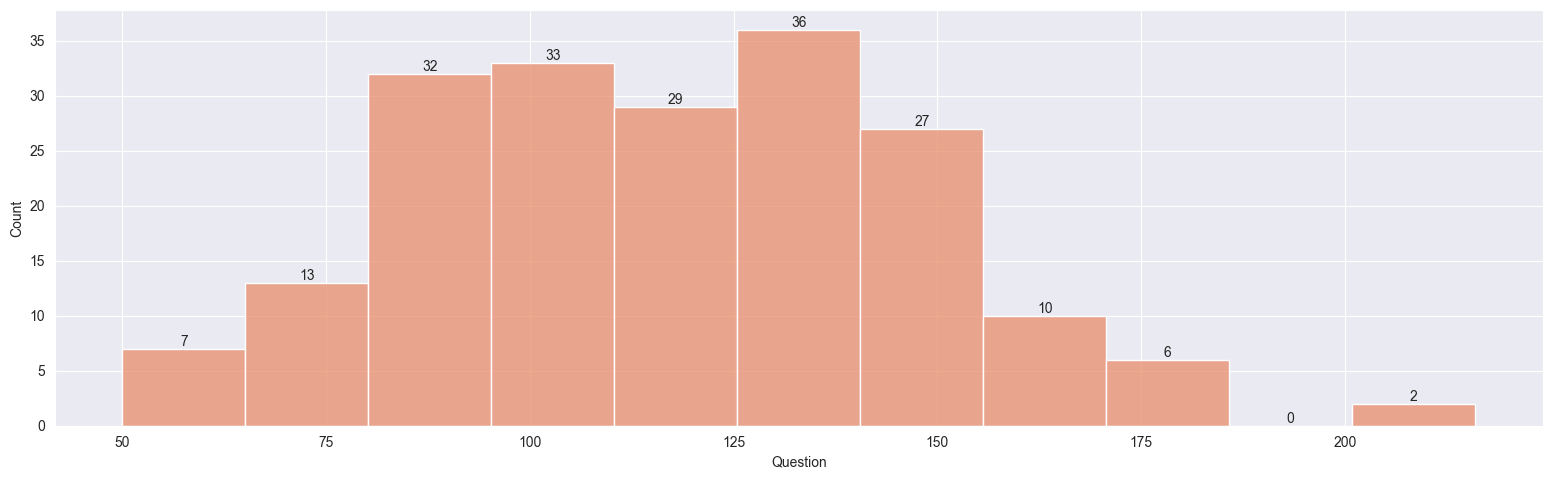

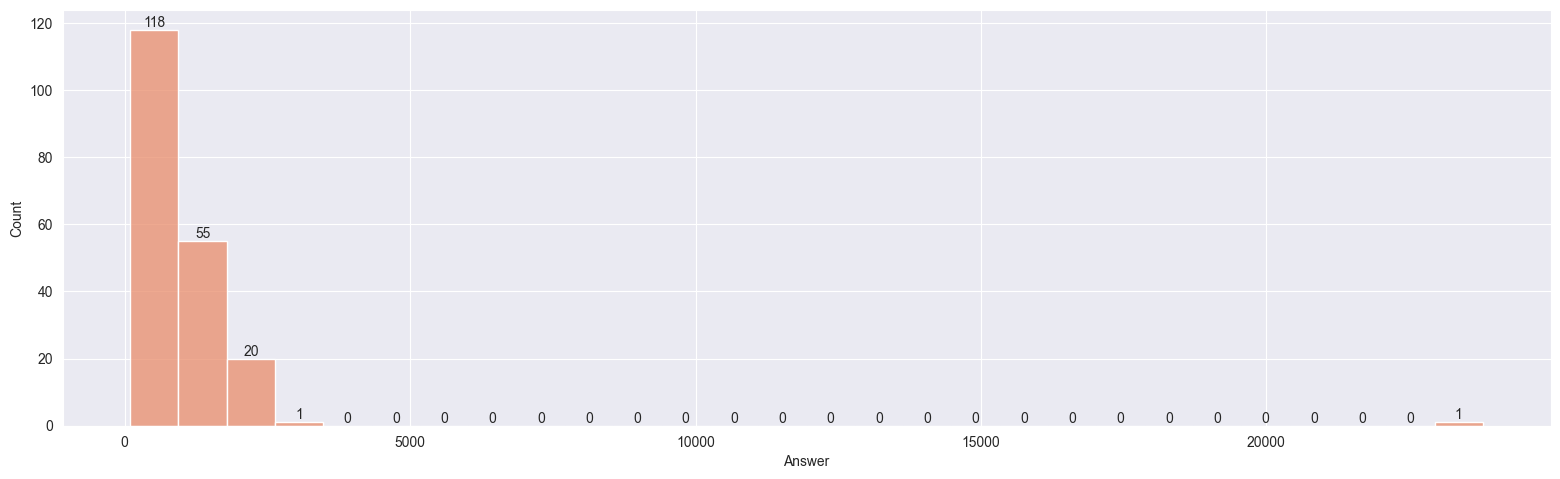

In [7]:
def plot_character_counts():
    ax = sns.histplot(df_answers['Question'].str.len())
    ax.bar_label(ax.containers[0])
    plt.show()

    ax = sns.histplot(df_answers['Answer'].str.len())
    ax.bar_label(ax.containers[0])
    plt.show()

plot_character_counts()

In [8]:
print(f'Mean character counts: {df_answers['Answer'].str.len().mean():.2f}')
print(f'Max character counts: {df_answers['Answer'].str.len().max()}')

Mean character counts: 1026.50
Max character counts: 23792


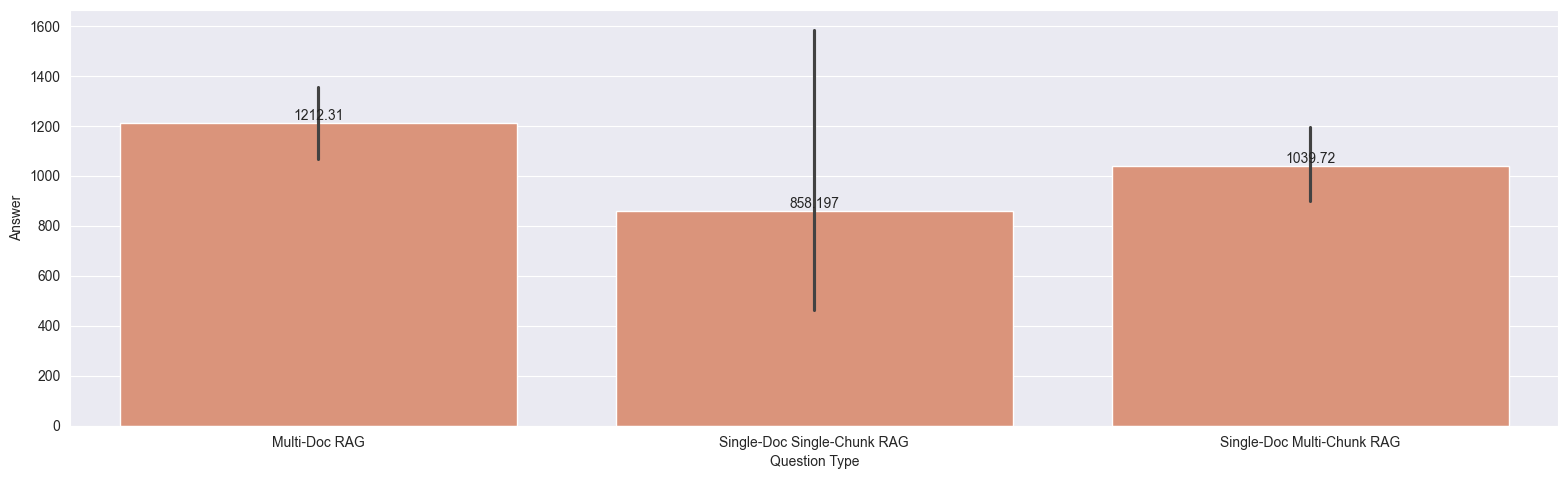

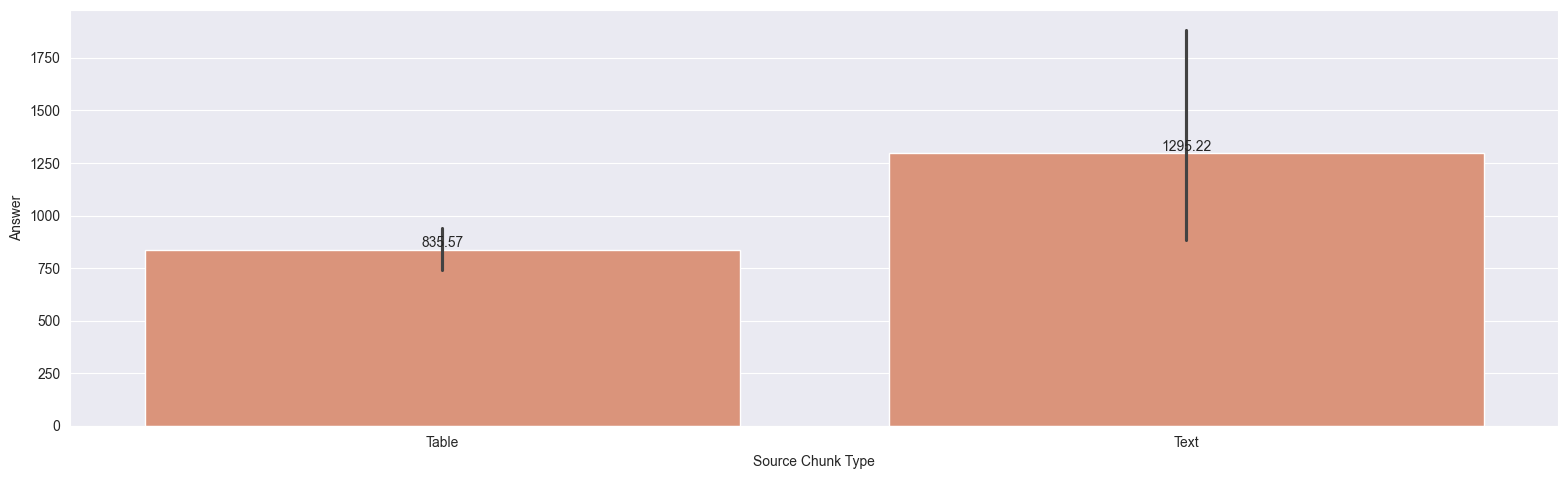

In [9]:
def plot_answer_len_from_provided_types():
    for col in ['Question Type', 'Source Chunk Type']:
        ax = sns.barplot(x=df_answers[col], y=df_answers['Answer'].str.len())
        ax.bar_label(ax.containers[0])

        plt.show()

plot_answer_len_from_provided_types()